In [59]:
# import basic libraries
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [60]:
data = pd.read_csv('./ANZdataset.csv')

In [61]:
salary_data = data[data["txn_description"]=="PAY/SALARY"].groupby(["customer_id"], as_index=False).sum()
salary_data['annual_salary'] = (salary_data['amount'] /92) * 365
salary_data.head()

,customer_id,card_present_flag,merchant_code,balance,age,amount,annual_salary
0,CUS-1005756958,0.0,0.0,61342.65,689,12616.11,50053.045109
1,CUS-1117979751,0.0,0.0,83700.42,147,25050.55,99385.334239
2,CUS-1140341822,0.0,0.0,35050.32,168,11499.06,45621.270652
3,CUS-1147642491,0.0,0.0,114575.08,442,22248.07,88266.799457
4,CUS-1196156254,0.0,0.0,166920.02,238,27326.11,108413.371196


Text(0, 0.5, 'Frequency')

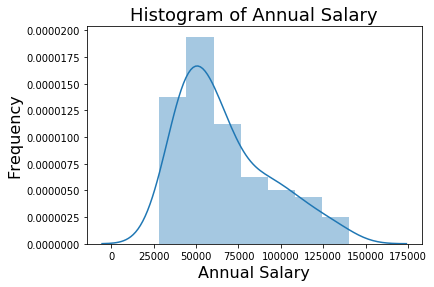

In [62]:
sns.distplot(salary_data.annual_salary)
plt.title('Histogram of Annual Salary', fontsize=18)
plt.xlabel('Annual Salary', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

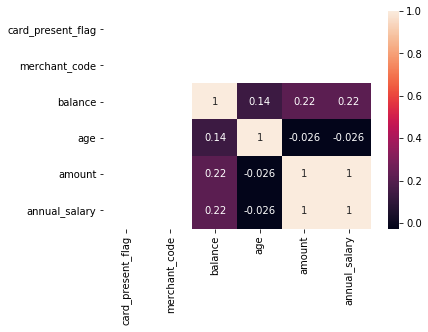

In [63]:
# plot correlation matrix
corrMatrix = salary_data.corr()
sns.heatmap(corrMatrix, annot=True)

# Linear Regression

In [64]:
salaryPredictor = pd.DataFrame(salary_data[['age','balance']])
annualSalary = pd.DataFrame(salary_data['annual_salary'])

In [65]:
# Split the Dataset into Train and Test
salaryPredictor_train, salaryPredictor_test, annualSalary_train, annualSalary_test = train_test_split(salaryPredictor, annualSalary, test_size = 0.2)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(salaryPredictor_train, annualSalary_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [66277.27671205]
Coefficients 	: a =  [[-14.62024789   0.02231165]]


In [67]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(salaryPredictor_train, annualSalary_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(salaryPredictor_test, annualSalary_test))

Explained Variance (R^2) on Train Set 	: 0.05249801621363881
Explained Variance (R^2) on Test Set 	: -0.003931861525863889


# Decision Trees

In [68]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0) 

# fit the regressor with X and Y data 
regressor.fit(salaryPredictor_train, annualSalary_train) 
regressor.score(salaryPredictor_train, annualSalary_train) 

1.0

In [69]:
regressor.score(salaryPredictor_test, annualSalary_test) 

-0.2649493505937881